In [27]:
%load_ext autoreload
%autoreload 2
import datetime
import numpy as np
import os
import pandas as pd
import sys

project_dir = os.sep.join([os.getcwd(), '..'])
#sys.path.append(os.sep.join([project_dir, 'src', 'processed']))
processed_data_dir = os.sep.join([project_dir, 'data', 'processed'])

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df_date = pd.read_feather(os.sep.join([processed_data_dir, 'datetime_features.feather']))
df_met  = pd.read_feather(os.sep.join([processed_data_dir, 'blindern_met_features.feather']))
df_sun  = pd.read_feather(os.sep.join([processed_data_dir, 'solar_elevation_1h.feather']))
df_nd   = pd.read_csv(os.sep.join([processed_data_dir, 'net_flow_2016', 'net_flow_05_2016.csv']), parse_dates=[0], infer_datetime_format=True)  # STEPHANIE'S DATA
df_nd['Unnamed: 0'] = df_nd['Unnamed: 0'].dt.tz_localize('UTC')
df_ndLP = pd.read_feather(os.sep.join([processed_data_dir, 'net_flow.feather']))

dfs = [df_date, df_met, df_sun, df_nd, df_ndLP]

In [29]:
for df in dfs:
    display(df.head())

,DateTime,hour,weekday,month,public_holiday,school_holiday
0,2016-04-01 00:00:00+00:00,0,4,4,0,0
1,2016-04-01 00:05:00+00:00,0,4,4,0,0
2,2016-04-01 00:10:00+00:00,0,4,4,0,0
3,2016-04-01 00:15:00+00:00,0,4,4,0,0
4,2016-04-01 00:20:00+00:00,0,4,4,0,0


,level_0,index,temperature,wind_speed,humidity,sunshine,precipitation,wind_direction_cat,weather_fair/cloudy,weather_fog/haze,weather_thunderstorm,weather_rain,weather_snow,weather_other
0,0,2016-04-01 00:00:00+00:00,2.1,6.0,46.0,0.0,0.0,7,1,0,0,0,0,0
1,1,2016-04-01 01:00:00+00:00,2.2,5.7,45.0,0.0,0.0,0,1,0,0,0,0,0
2,2,2016-04-01 02:00:00+00:00,0.7,5.8,51.0,0.0,0.0,0,1,0,0,0,0,0
3,3,2016-04-01 03:00:00+00:00,-0.3,2.0,55.0,0.0,0.0,1,1,0,0,0,0,0
4,4,2016-04-01 04:00:00+00:00,-1.8,2.2,62.0,0.0,0.0,5,1,0,0,0,0,0


,index,solar_elevation_angle,solar_elevation_cat
0,2016-04-01 00:00:00+00:00,-25.016272,0
1,2016-04-01 01:00:00+00:00,-22.599384,0
2,2016-04-01 02:00:00+00:00,-18.344495,0
3,2016-04-01 03:00:00+00:00,-12.646478,0
4,2016-04-01 04:00:00+00:00,-5.935906,0


,Unnamed: 0,157,158,159,160,161,162,163,164,165,...,476,477,478,479,480,482,483,484,486,487
0,2016-05-01 03:00:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-01 03:05:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-01 03:10:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-01 03:15:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-01 03:20:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,index,157,158,159,160,161,162,163,164,165,...,476,477,478,479,480,482,483,484,486,487
0,2016-04-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 00:05:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 00:10:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 00:15:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 00:20:00+00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


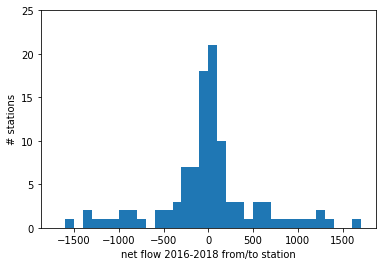

In [45]:
sum_over_time = df_nd.sum()
sum_over_time = sum_over_time[sum_over_time.ne(0)]
ax = sum_over_time.plot.hist(bins=range(-1700, 1701, 100))
ax.set_ylim(0, 25)
ax.set_xlabel('net flow 2016-2018 from/to station')
ax.set_ylabel('# stations')
fig = ax.get_figure()
fig.savefig('netflow.svg')

In [5]:
df_joined = pd.merge(df_date, df_met, left_on='DateTime', right_on='index', how='left')
df_joined.drop(columns=['level_0', 'index'], inplace=True)
df_joined = pd.merge(df_joined, df_sun, left_on='DateTime', right_on='index', how='left')
df_joined.drop(columns=['index', 'solar_elevation_cat'], inplace=True)
df_joined = pd.merge(df_joined, df_nd, left_on='DateTime', right_on='Unnamed: 0', how='right') # net demand data is leading for join

In [6]:
all_vars = df_joined.columns
cont_vars = ['DateTime', 'temperature', 'wind_speed', 'humidity', 'sunshine', 'precipitation', 'solar_elevation_angle']
cat_vars = [var for var in all_vars if not var in cont_vars]

wind_direction_cat 8155
weather_fair/cloudy 8155
weather_fog/haze 8155
weather_thunderstorm 8155
weather_rain 8155
weather_snow 8155
weather_other 8155


In [9]:
df_joined.head(13)

,DateTime,hour,weekday,month,public_holiday,school_holiday,temperature,wind_speed,humidity,sunshine,...,476,477,478,479,480,482,483,484,486,487
0,2016-05-01 03:00:00+00:00,3,6,5,1,0,3.7,2.600000,93.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-01 03:05:00+00:00,3,6,5,1,0,3.7,2.566667,93.083333,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-01 03:10:00+00:00,3,6,5,1,0,3.7,2.533333,93.166667,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-01 03:15:00+00:00,3,6,5,1,0,3.7,2.500000,93.250000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-01 03:20:00+00:00,3,6,5,1,0,3.7,2.466667,93.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-05-01 03:25:00+00:00,3,6,5,1,0,3.7,2.433333,93.416667,0.0,...,0,0,0,0,0,0,0,0,0,0
6,2016-05-01 03:30:00+00:00,3,6,5,1,0,3.7,2.400000,93.500000,0.0,...,0,0,0,0,0,0,0,0,0,0
7,2016-05-01 03:35:00+00:00,3,6,5,1,0,3.7,2.366667,93.583333,0.0,...,0,0,0,0,0,0,0,0,0,0
8,2016-05-01 03:40:00+00:00,3,6,5,1,0,3.7,2.333333,93.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-05-01 03:45:00+00:00,3,6,5,1,0,3.7,2.300000,93.750000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for v in cat_vars:
    pass
    #print(v, df_joined[v].isna().sum())
    #df_joined[v] = df_joined[v].astype('int32')      # This does not work because there are nans in the columns.
    #df_joined[v] = df_joined[v].astype('category')   # So we have to transform to categories when we have dropped the nan-rows.
#print(df_joined.loc[df_joined['wind_direction_cat'].isna(), :].head(20))

In [11]:
df_joined.head(13)

,DateTime,hour,weekday,month,public_holiday,school_holiday,temperature,wind_speed,humidity,sunshine,...,476,477,478,479,480,482,483,484,486,487
0,2016-05-01 03:00:00+00:00,3,6,5,1,0,3.7,2.600000,93.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-01 03:05:00+00:00,3,6,5,1,0,3.7,2.566667,93.083333,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-01 03:10:00+00:00,3,6,5,1,0,3.7,2.533333,93.166667,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-01 03:15:00+00:00,3,6,5,1,0,3.7,2.500000,93.250000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-01 03:20:00+00:00,3,6,5,1,0,3.7,2.466667,93.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-05-01 03:25:00+00:00,3,6,5,1,0,3.7,2.433333,93.416667,0.0,...,0,0,0,0,0,0,0,0,0,0
6,2016-05-01 03:30:00+00:00,3,6,5,1,0,3.7,2.400000,93.500000,0.0,...,0,0,0,0,0,0,0,0,0,0
7,2016-05-01 03:35:00+00:00,3,6,5,1,0,3.7,2.366667,93.583333,0.0,...,0,0,0,0,0,0,0,0,0,0
8,2016-05-01 03:40:00+00:00,3,6,5,1,0,3.7,2.333333,93.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-05-01 03:45:00+00:00,3,6,5,1,0,3.7,2.300000,93.750000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# The following can be used when we want to mask away the hours when the stations are closed:

In [13]:
mask = (df_met['index'].dt.hour >= 10) & (df_met['index'].dt.hour <= 11)
# mask

In [26]:
df_joined.shape

(8892, 273)

# Data exploration